# 가설 검정(Hypothesis Testing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
import pandas_datareader.data as web
import datetime as dt

## Microsoft사의 주식의 평균 수익률이 양수인지 검증하기

### 가설 수립
1. $H_0$ : Microsoft사의 주식의 평균 수익률이 0이하이다.
2. $H_1$ : Microsoft사의 주식의 평균 수익률이 0이상이다.

#### Yahoo finance로 부터 데이터 읽기

In [3]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2016,1,1)
MSFT = web.DataReader('MSFT','yahoo',start=start, end=end)

In [4]:
MSFT

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.980000,30.990000,30.480000,30.480000,24.544783,31929700
2010-01-04,30.620001,31.100000,30.590000,30.950001,24.923265,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,24.931318,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,24.778313,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,24.520622,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,24.689730,51197400
2010-01-11,30.709999,30.760000,30.120001,30.270000,24.375685,68754700
2010-01-12,30.150000,30.400000,29.910000,30.070000,24.214621,65912100
2010-01-13,30.260000,30.520000,30.010000,30.350000,24.440102,51863500


날짜별 수익률을 구한다.

In [5]:
price = MSFT['Adj Close']
returns = price.pct_change()[1:]

주식 가격

In [6]:
price

Date
2009-12-31    24.544783
2010-01-04    24.923265
2010-01-05    24.931318
2010-01-06    24.778313
2010-01-07    24.520622
2010-01-08    24.689730
2010-01-11    24.375685
2010-01-12    24.214621
2010-01-13    24.440102
2010-01-14    24.931318
2010-01-15    24.850792
2010-01-19    25.044058
2010-01-20    24.633364
2010-01-21    24.166307
2010-01-22    23.320772
2010-01-25    23.610674
2010-01-26    23.755617
2010-01-27    23.892517
2010-01-28    23.481817
2010-01-29    22.692654
2010-02-01    22.877863
2010-02-02    22.918135
2010-02-03    23.055025
2010-02-04    22.418863
2010-02-05    22.563814
2010-02-08    22.322224
2010-02-09    22.555761
2010-02-10    22.539648
2010-02-11    22.644337
2010-02-12    22.491335
                ...    
2015-11-18    50.807163
2015-11-19    50.892090
2015-11-20    51.127956
2015-11-23    51.127956
2015-11-24    51.184570
2015-11-25    50.656204
2015-11-27    50.882645
2015-11-30    51.278912
2015-12-01    52.099762
2015-12-02    52.090317
2015-12-03 

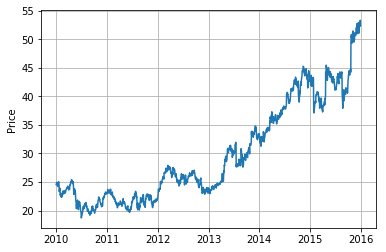

In [7]:
plt.plot(price)
plt.grid()
plt.ylabel('Price')
plt.show()

주식 수익률

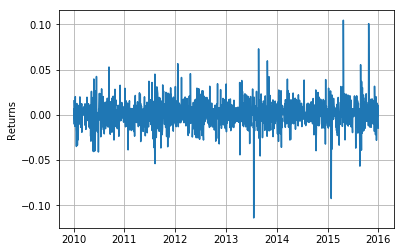

In [8]:
plt.plot(returns)
plt.grid()
plt.ylabel('Returns')
plt.show()

정규 분포의 $95\%$ 신뢰 구간 

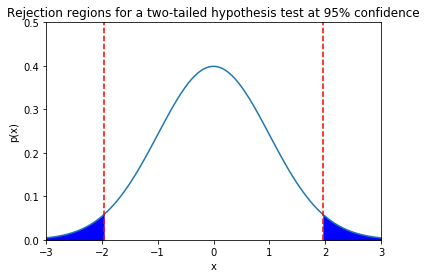

In [9]:
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x > 1.96, color='blue')
ax.fill_between(x, 0, y, where = x < -1.96, color='blue')
plt.plot([1.96,1.96],[0,0.5], 'r--')
plt.plot([-1.96,-1.96],[0,0.5], 'r--')
plt.title('Rejection regions for a two-tailed hypothesis test at 95% confidence')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim(-3,3)
plt.ylim(0,0.5)
plt.show()

수익률의 통계량 계산

In [10]:
n = len(returns)
test_statistic = ((returns.mean() - 0) /
                (returns.std()/np.sqrt(n-1)))
print ('t test statistic: ', test_statistic)

t test statistic:  1.61535780489


In [11]:
from scipy.stats import norm
p_val = (1 - norm.cdf(test_statistic,0,1))
print('P-value is: ', p_val)

P-value is:  0.0531166161432


P-value가 0.05보다 크므로, $H_0$를 기각할 수 없다.

## 두 집단의 평균 비교
APPLE사의 주식의 평균 수익률이 시장의 평균 수익률이 다른지 검증

### 가설 수립
1. $H_0$ : APPLE사의 주식의 평균 수익률에서 시장의 평균 수익률을 뺀 값이 0이다.
2. $H_1$ : APPLE사의 주식의 평균 수익률에서 시장의 평균 수익률을 뺀 값은 0이 아니다.

데이터 불러오기 & 수익률 계산

In [12]:
SPY = web.DataReader('^GSPC','yahoo',start=start, end=end)
AAPL = web.DataReader('AAPL','yahoo',start=start, end=end)

In [13]:
SPY_price = SPY['Adj Close']
AAPL_price = AAPL['Adj Close']
SPY_returns = SPY_price.pct_change()[1:]
AAPL_returns = AAPL_price.pct_change()[1:]

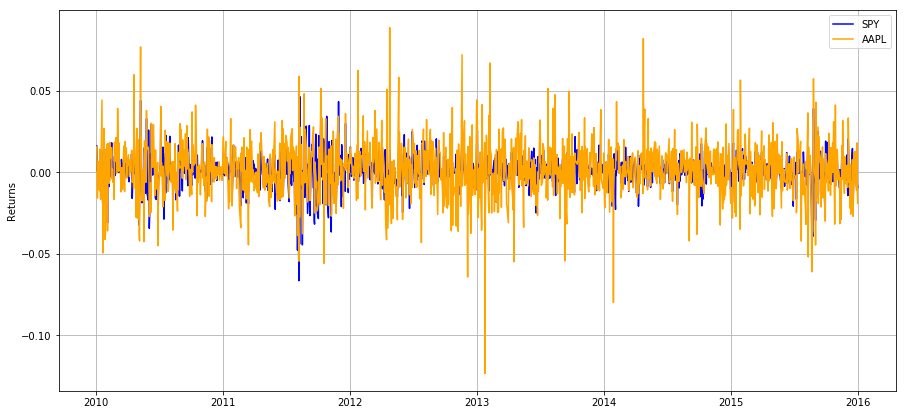

In [14]:
plt.figure(1, figsize = (15, 7))
plt.plot(SPY_returns,label='SPY', color = 'blue')
plt.plot(AAPL_returns,label='AAPL', color = 'orange')
plt.grid()
plt.ylabel('Returns')
plt.legend()
plt.show()

### 두 집단이 정규분포를 따르고, 분산은 같지만, 분산값이 알려져 있지 않은 경우 
두 집단의 평균 비교는 다음의 통계량을 이용한다.

$$ t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2})^{1/2}} = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2})^{1/2}}$$

$$s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2)}{n_1 + n_2 - 2}$$

이 경우 t는 t-분포를 따르고, 자유도는 $n_1 + n_2 - 2$가 된다.

### 두 집단이 정규분포를 따르지만, 분산값이 알려져 있지 않은 경우 
두 집단의 평균 비교는 다음의 통계량을 이용한다.

$$ t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}} = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}}$$
$s_1^2$, $s_2^2$은 각각의 표본 분산이다.

이 경우 t는 t-분포를 따르고, 자유도는 $df = \frac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{(s_1^2/n_1)^2}{n_1} + \frac{(s_2^2/n_2)^2}{n_2}}$가 된다.




통계량 계산

In [17]:
mu_spy = SPY_returns.mean()
mu_aapl = AAPL_returns.mean()
s_spy = SPY_returns.std()
s_aapl = AAPL_returns.std()
n_spy = len(SPY_returns)
n_aapl = len(AAPL_returns)

test_statistic = ((mu_aapl - mu_spy) - 0)/((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**0.5
df = ((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**2/(((s_spy**2 / n_spy)**2 /n_spy)+((s_aapl**2 / n_aapl)**2/n_aapl))

print('t test statistic: ', test_statistic)
print('Degrees of freedom (modified): ', df)

t test statistic:  1.12460616015
Degrees of freedom (modified):  2465.17409534


자유도가 매우 높을 때(>30)의 t-distribution은 정규분포에 근사하므로, 신뢰도 $95\%$ 구간은 [-1.96, 1.96]이다. 따라서, 귀무가설을 기각할 수 없다.

## P-value의 이해

P-value는 귀무가설을 가정할 때, 통계량이 귀무가설 보다 더 극한의 값을 가질 확률을 의미하는 것이지, $H_1$이 맞을 확률이 아니다.

### 실험의 반복

$H_0$를 기각했을 때, 실제로 $H_0$인 경우를 제 1종 오류(Type 1 error)라고 한다. Type 1 error의 확률은 유의수준(siginificant level)과 같다. 실제로 Type 1 error가 나올 확률이 유의 수준과 같은지 확인해 보자.

In [21]:
df = pd.DataFrame()
T = 20
N = 100

for i in range(T):
    X = stats.norm.rvs(0, 1, N)
    name = 'X{}'.format(i)
    df[name] = X

In [17]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,-0.202900,-1.277519,1.028058,0.190563,-1.574994,-0.809000,1.005462,-0.464991,-1.351480,1.449525,0.606950,0.364771,-0.142517,-0.286599,0.136852,-0.202982,0.692113,1.276782,-1.358113,0.864741
1,-0.086857,1.539190,-0.461561,0.183189,-0.047640,0.502380,-1.492676,1.260369,1.619478,-1.708090,1.950392,-0.277151,-0.310941,1.668831,-1.290646,1.193194,0.051497,0.735731,1.875563,-0.395168
2,1.355651,-0.055740,-1.805089,0.065554,-0.513596,-0.608245,1.236461,1.450703,0.181633,0.423455,-1.337007,1.756696,0.423281,-0.811870,0.173631,1.068699,-0.883310,1.718716,0.286464,-0.257340
3,0.200273,-0.533321,0.617519,0.832399,-0.642040,2.018620,0.336052,0.016554,0.672991,-0.349347,0.723485,0.204008,-0.802763,0.590399,0.969875,0.673652,0.499211,-0.693102,0.658534,1.382075
4,0.486667,-2.539691,-0.200666,-0.951950,0.528610,1.038601,1.140174,-0.610077,-1.352751,-0.258922,-0.266722,0.193845,-0.204401,-1.685599,1.838009,-0.319347,0.453427,2.227912,-0.769186,-1.329564


In [22]:
cutoff = 0.05
TypeIerror=0
for i in range(T):
    Xi = df.iloc[:, i]
    test_statistic = ((Xi.mean() - 0) /
                (Xi.std()/np.sqrt(N-1)))
    pvalue = (1 - t.cdf(test_statistic, N - 1))
    if pvalue < cutoff:
        TypeIerror += 1

In [23]:
TypeIerror

2

In [25]:
len(Xi)

100

횟수를 좀 더 늘려서 시도하기 위해 함수 정의

N개의 데이터 샘플을 이용한 가설 검정을 T번 시행하고, 각 시행에 대한 p-value를 반환하는 함수

In [26]:
def do_experiment(N, T, cutoff=0.05):
    results=[]
    
    # Make random data
    for i in range(T):
        X = stats.norm.rvs(0, 1, N)
        test_statistic = ((X.mean() - 0) /(X.std()/np.sqrt(N-1)))
        pvalue = (1 - t.cdf(test_statistic, N - 1))
        results.append(pvalue)
    return results

P-value 자체도 하나의 확률 변수로 볼 수 있다. 실제로 P-value는 [0,1]사이에서 균등하게 분포 되어있다.

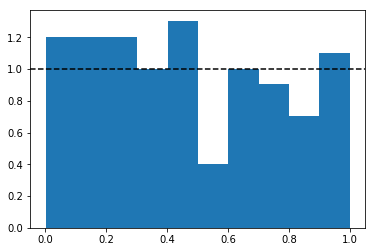

In [31]:
N=10
T=100
p_values = do_experiment(N,T,cutoff=0.05)
plt.hist(p_values,normed=True)
plt.plot((-0.05,1.05), (1,1), 'k--')
plt.xlim(-0.05,1.05)
plt.show()

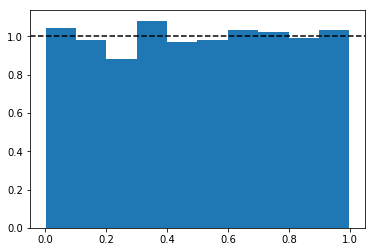

In [34]:
N=10
T=1000
p_values = do_experiment(N,T,cutoff=0.05)
plt.hist(p_values,normed=True)
plt.plot((-0.05,1.05), (1,1), 'k--')
plt.xlim(-0.05,1.05)
plt.show()

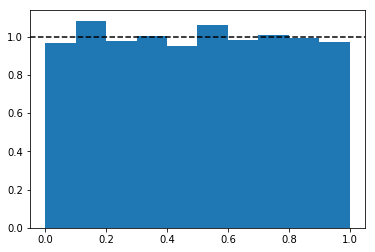

In [38]:
N=50
T=10000
p_values = do_experiment(N,T,cutoff=0.05)
plt.hist(p_values,normed=True)
plt.plot((-0.05,1.05), (1,1), 'k--')
plt.xlim(-0.05,1.05)
plt.show()

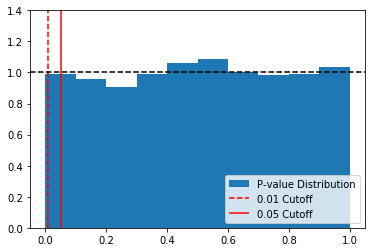

In [24]:
N=50
T=2000
p_values = do_experiment(N,T,cutoff=0.05)
plt.hist(p_values,normed=True, label='P-value Distribution')
plt.plot((-0.05,1.05), (1,1), 'k--')
plt.vlines(0.01, 0, 1.5, colors='r', linestyle='--', label='0.01 Cutoff')
plt.vlines(0.05, 0, 1.5, colors='r', label='0.05 Cutoff')
plt.xlim(-0.05,1.05)
plt.ylim(0,1.4)
plt.legend(loc='lower right')
plt.show()